In [1]:
import pandas as pd

In [2]:
#load data directly from my MSSQL Server
import pyodbc

# MSSQL connection string
conn = pyodbc.connect('DRIVER={SQL Server};'
                      'SERVER=DESKTOP-HE6JTL7\SQLEXPRESS01;'
                      'DATABASE=SupplyChainOptimization;'
                      'Trusted_Connection=yes;')

# Load data from MSSQL
query = "SELECT * FROM supply_chain_data"
df = pd.read_sql(query, conn)

# Display few sample rows
df.sample(10)


C:\Users\elitebook\AppData\Local\Temp\ipykernel_10864\3398020795.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
64,skincare,SKU64,89.634094,11,134,8458.730469,Female,73,27,75,...,Delhi,17,328,6,8.693043,Fail,0.159486,Air,Route C,771.225098
41,skincare,SKU41,99.113289,35,556,5521.205078,Female,64,19,38,...,Chennai,18,892,7,95.332062,Fail,0.045302,Sea,Route A,275.524384
74,haircare,SKU74,3.170012,64,904,5709.945312,Female,41,6,1,...,Delhi,1,919,9,80.580849,Fail,0.396613,Rail,Route A,341.552643
51,haircare,SKU51,26.700762,61,154,9866.465820,Male,100,4,52,...,Bangalore,18,673,28,14.190329,Pending,1.772951,Road,Route A,694.982300
54,haircare,SKU54,31.146244,11,622,6088.021484,Non-binary,33,22,61,...,Kolkata,26,497,29,30.186024,Pass,2.478772,Road,Route B,814.070007
31,skincare,SKU31,50.847393,28,168,9655.134766,Male,6,17,44,...,Chennai,24,461,8,60.251144,Pending,2.989000,Rail,Route C,609.379211
34,skincare,SKU34,37.467594,96,602,9061.710938,Unknown,1,26,21,...,Chennai,4,452,10,10.754272,Pass,0.646605,Road,Route B,510.358002
81,haircare,SKU81,72.819206,9,774,4384.413574,Unknown,48,6,8,...,Delhi,28,698,1,19.789593,Pending,2.547547,Rail,Route B,276.778351
56,skincare,SKU56,20.986385,90,93,4767.020508,Non-binary,25,23,83,...,Mumbai,24,826,28,12.836285,Pass,1.173756,Air,Route B,832.210815
75,skincare,SKU75,92.996887,29,106,1889.073608,Non-binary,16,20,56,...,Chennai,25,759,11,48.064781,Pass,2.030069,Air,Route C,873.129639


In [3]:
#check for missing values
df.isna().sum()

Product_type               0
SKU                        0
Price                      0
Availability               0
Number_of_products_sold    0
Revenue_generated          0
Customer_demographics      0
Stock_levels               0
Lead_times                 0
Order_quantities           0
Shipping_times             0
Shipping_carriers          0
Shipping_costs             0
Supplier_name              0
Location                   0
Lead_time                  0
Production_volumes         0
Manufacturing_lead_time    0
Manufacturing_costs        0
Inspection_results         0
Defect_rates               0
Transportation_modes       0
Routes                     0
Costs                      0
dtype: int64

In [4]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number_of_products_sold  100 non-null    int64  
 5   Revenue_generated        100 non-null    float64
 6   Customer_demographics    100 non-null    object 
 7   Stock_levels             100 non-null    int64  
 8   Lead_times               100 non-null    int64  
 9   Order_quantities         100 non-null    int64  
 10  Shipping_times           100 non-null    int64  
 11  Shipping_carriers        100 non-null    object 
 12  Shipping_costs           100 non-null    float64
 13  Supplier_name            100 non-null    object 
 14  Location                 10

In [5]:
#statistical summary
df.describe()

,Price,Availability,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048204,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245783
std,31.168193,30.743317,303.780074,2732.841758,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618530,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916245
25%,19.597823,22.750000,184.250000,2812.847046,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778465
50%,51.239830,43.500000,392.500000,6006.352051,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430450
75%,77.198231,75.000000,704.250000,8253.977051,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621027,3.563995,763.078217
max,99.171326,100.000000,996.000000,9866.465820,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466110,4.939255,997.413452


In [6]:
# Count duplicate rows
df.duplicated().sum()

0

In [7]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Product_type:
Product_type
skincare     40
haircare     34
cosmetics    26
Name: count, dtype: int64

Unique values in SKU:
SKU
SKU0     1
SKU63    1
SKU73    1
SKU72    1
SKU71    1
        ..
SKU30    1
SKU29    1
SKU28    1
SKU27    1
SKU99    1
Name: count, Length: 100, dtype: int64

Unique values in Customer_demographics:
Customer_demographics
Unknown       31
Female        25
Non-binary    23
Male          21
Name: count, dtype: int64

Unique values in Shipping_carriers:
Shipping_carriers
Carrier B    43
Carrier C    29
Carrier A    28
Name: count, dtype: int64

Unique values in Supplier_name:
Supplier_name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

Unique values in Location:
Location
Kolkata      25
Mumbai       22
Chennai      20
Bangalore    18
Delhi        15
Name: count, dtype: int64

Unique values in Inspection_results:
Inspection_results
Pending    41
Fail       36
Pass       23
Name: co

C:\Users\elitebook\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


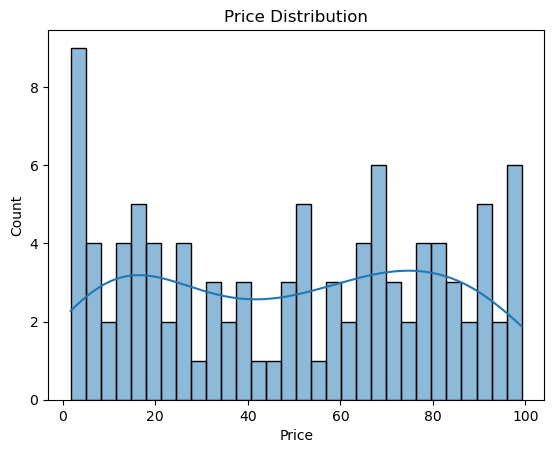

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of price distribution
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()



In [9]:
#machine learning models to improve inventory management & supplier performance

In [27]:
pip install prophet

  Using cached holidays-0.69-py3-none-any.whl.metadata (28 kB)
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 435.7 kB/s eta 0:00:31
   ---------------------------------------- 0.0/13.3 MB 435.7 kB/s eta 0:00:31
   ---------------------------------------- 0.1/13.3 MB 272.3 kB/s eta 0:00:49
   ---------------------------------------- 0.1/13.3 MB 374.1 kB/s eta 0:00:36
   ---------------------------------------- 0.1/13.3 MB 385.0 kB/s eta 0:00:35
   ---------------------------------------- 0.1/13.3 MB 385.0 kB/s eta 0:00:35
   ---------------------------------------- 0.2/13.3 MB 446.5 kB/s eta 0:00:30
    --------------------------------------- 0.2/13.3 MB 550.0 kB/s eta 0:00:24
    --------------------------------------- 0.2/13.3 MB 550.0 kB/s eta 0:00:24
    --------------------------------------- 0.3/13.3 MB 532.5 kB/s eta 0:00:25
   - --

In [10]:
#generate synthetic date column assuming daily sales from 2023-01-01
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

In [12]:
#the last date on the generated dates column is 2023-04-10
#the first date is 2023-01-01

In [13]:
#Demand forecasting -using the Facebook prophet model
#helps in stocking the right inventory and reducing overstock/shortages
from prophet import Prophet

# Prepare dataset for time-series forecasting
df['Date'] = pd.to_datetime(df['Date'])
df_forecast = df.groupby('Date')['Number_of_products_sold'].sum().reset_index()
df_forecast.columns = ['ds', 'y']



In [14]:
df_forecast.tail(5)

,ds,y
95,2023-04-06,672
96,2023-04-07,324
97,2023-04-08,62
98,2023-04-09,913
99,2023-04-10,627


In [15]:
# Train the model
model = Prophet()
model.fit(df_forecast)

# Create future dataframe
future = model.make_future_dataframe(periods=30)  # Predict next 30 days
forecast = model.predict(future)



13:47:42 - cmdstanpy - INFO - Chain [1] start processing
13:47:42 - cmdstanpy - INFO - Chain [1] done processing


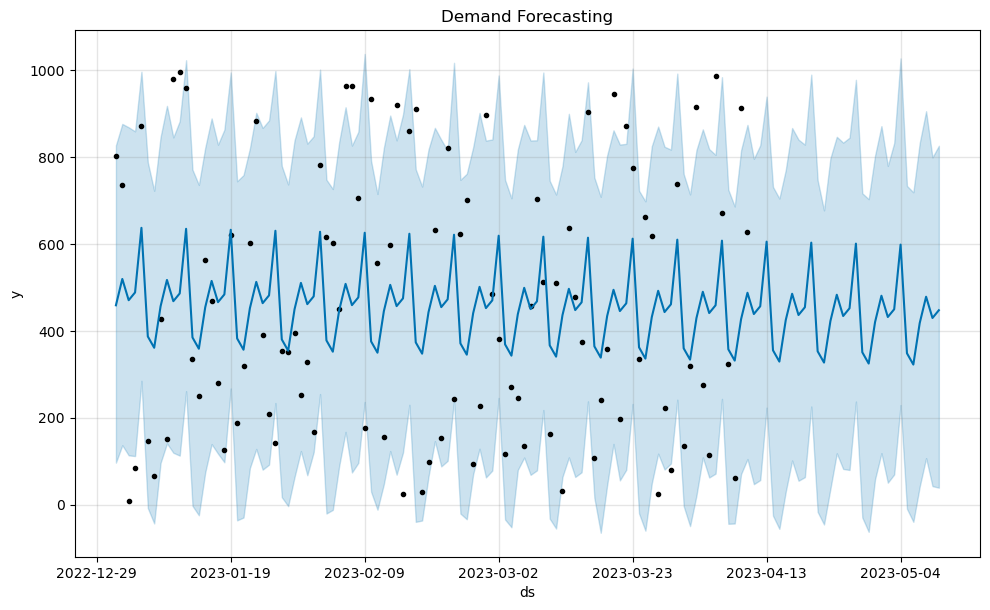

In [16]:
# Plot forecast
model.plot(forecast)
plt.title('Demand Forecasting')
plt.show()

In [17]:
import numpy as np
from scipy.signal import argrelextrema


In [18]:
# Assuming 'forecast' is the output DataFrame from Prophet
df_forecast = forecast[['ds', 'yhat']]  # yhat is the predicted values

# Convert 'ds' to datetime for proper indexing
df_forecast.loc[:, 'ds'] = pd.to_datetime(df_forecast['ds'])
df_forecast.loc[:, 'yhat'] = df_forecast['yhat'].astype(float)

In [19]:
# Find local maxima (peaks)
peaks = argrelextrema(df_forecast['yhat'].values, np.greater, order=3)[0]

# Find local minima (valleys)
valleys = argrelextrema(df_forecast['yhat'].values, np.less, order=3)[0]

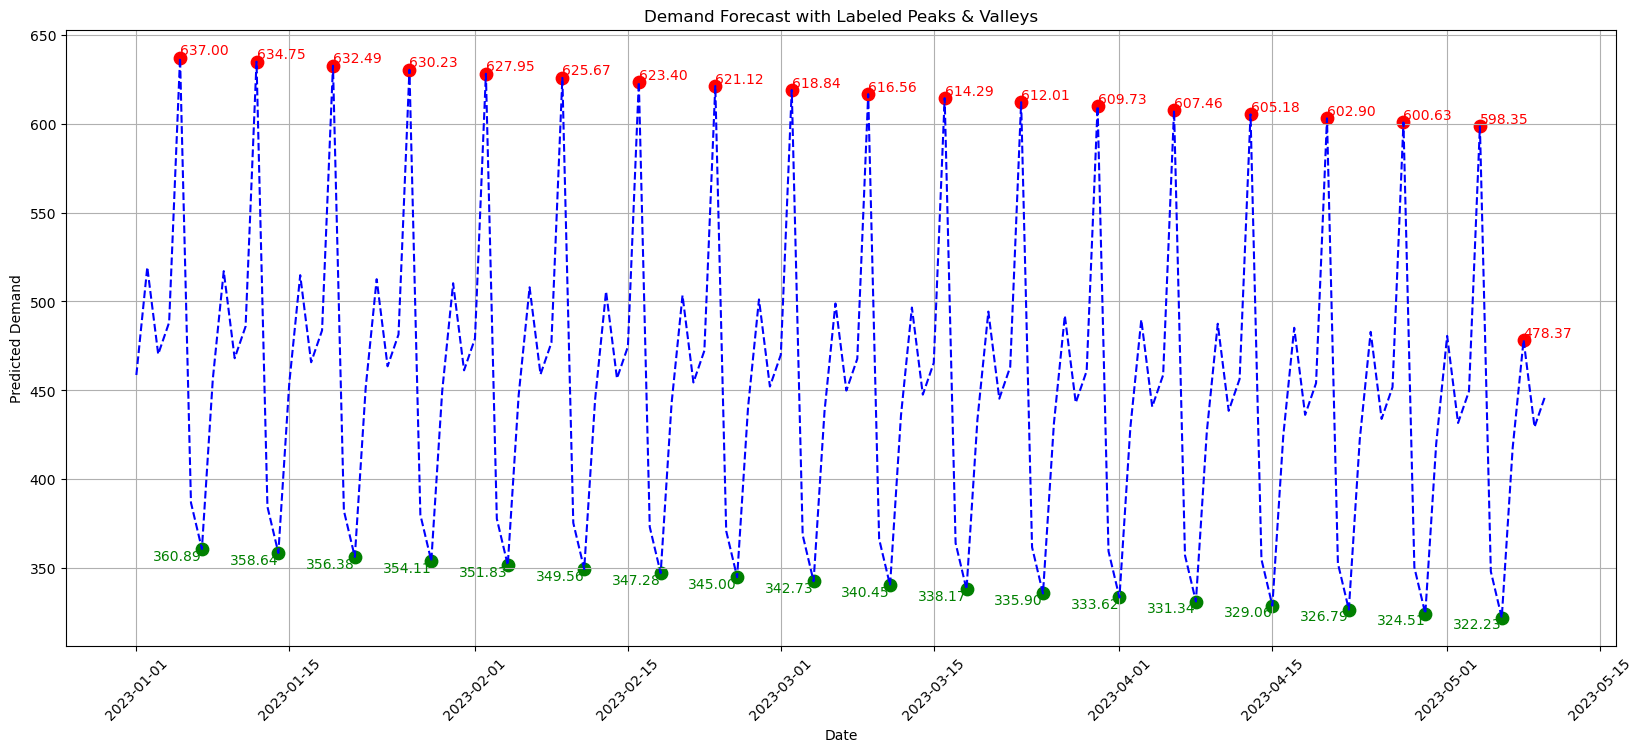

In [50]:
# Plot the forecasted trend
plt.figure(figsize=(20,8))
plt.plot(df_forecast['ds'], df_forecast['yhat'], label="Forecast Trend", color='blue', linestyle='dashed')

# Label and plot peaks (red)
for peak in peaks:
    plt.scatter(df_forecast['ds'].iloc[peak], df_forecast['yhat'].iloc[peak], color='red', marker='o', s=80, label="Peak" if peak == peaks[0] else "")
    plt.text(df_forecast['ds'].iloc[peak], df_forecast['yhat'].iloc[peak], 
             f"{df_forecast['yhat'].iloc[peak]:.2f}", 
             ha='left', va='bottom', fontsize=10, color='red')

# Label and plot valleys (green)
for valley in valleys:
    plt.scatter(df_forecast['ds'].iloc[valley], df_forecast['yhat'].iloc[valley], color='green', marker='o', s=80, label="Valley" if valley == valleys[0] else "")
    plt.text(df_forecast['ds'].iloc[valley], df_forecast['yhat'].iloc[valley], 
             f"{df_forecast['yhat'].iloc[valley]:.2f}", 
             ha='right', va='top', fontsize=10, color='green')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)  

plt.xlabel("Date")
plt.ylabel("Predicted Demand")
plt.title("Demand Forecast with Labeled Peaks & Valleys")
plt.grid()
plt.show()



In [20]:
#demand is seasonal

In [21]:
#supplier preformance analysis- clustering suppliers based on lead_time, defect)rate and cost
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
# Select features
X = df[['Lead_time', 'Defect_rates', 'Manufacturing_costs']]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\elitebook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elitebook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


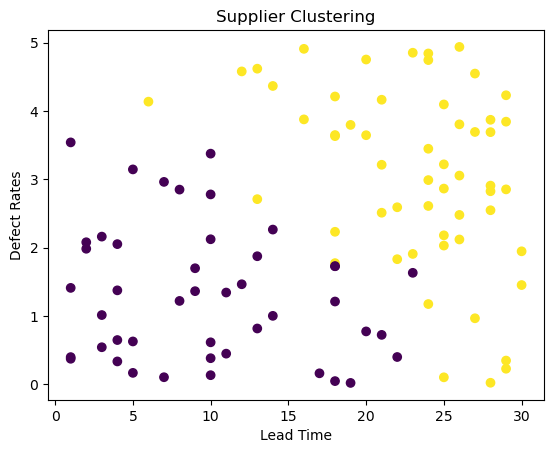

In [25]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df['SupplierCluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.scatter(df['Lead_time'], df['Defect_rates'], c=df['SupplierCluster'], cmap='viridis')
plt.xlabel('Lead Time')
plt.ylabel('Defect Rates')
plt.title('Supplier Clustering')
plt.show()

In [26]:
# Check cluster statistics
cluster_summary = df.groupby('SupplierCluster')[['Lead_time', 'Defect_rates', 'Manufacturing_costs']].mean()
print(cluster_summary)



                 Lead_time  Defect_rates  Manufacturing_costs
SupplierCluster                                              
0                 9.733333      1.312522            55.642716
1                23.090909      3.066406            40.413584


In [27]:
# Manually check which cluster has lower defect rates and lead times
good_supplier = cluster_summary['Defect_rates'].idxmin()  # Cluster with lowest defect rates
poor_supplier = cluster_summary['Defect_rates'].idxmax()  # Cluster with highest defect rates

# Map clusters to meaningful labels
df['Supplier_Performance'] = df['SupplierCluster'].map({good_supplier: 1, poor_supplier: 0})

# Check new labels
print(df[['SupplierCluster', 'Supplier_Performance']].value_counts())


SupplierCluster  Supplier_Performance
1                0                       55
0                1                       45
Name: count, dtype: int64


In [56]:
#suppliers with cluster purple ( Low to Medium Lead Time & Low to Medium Defect Rates)- are ideal partners since they deliver products quickly with minimum defects
##they should be used for primary sourcing
#you might want to consider restructuring contracts with team yellow since they take longer to deliver lower quality products

In [32]:
#Classify suppliers as either poor or good suppliers using XGBoost based on lead time and defect rates
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score



In [37]:
# Identify categorical columns
categorical_features = ['Supplier_name', 'Location', 'Transportation_modes']

# Apply Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numeric values
    label_encoders[col] = le  # Store encoder for reference

# Create "Good" or "Poor" labels
df['Supplier_Label'] = df['Supplier_Performance'].map({1: 'Good', 0: 'Poor'})



In [38]:
# Select features (all numeric now)
features = ['Lead_time', 'Defect_rates', 'Manufacturing_costs', 'Production_volumes', 
            'Shipping_times'] + categorical_features  # Categorical variables are now encoded

X = df[features]
y = df['Supplier_Performance']



In [39]:
# Split data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [40]:
# Scale numerical features (excluding categorical ones)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [41]:
# Train XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate model performance
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))



XGBoost Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.67      0.80         9

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



C:\Users\elitebook\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:08:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
#Our XGBoost model is 85% accurate
# Check final dataset with labeled supplier performance
df[['SupplierCluster', 'Supplier_Performance', 'Supplier_Label']].head()

,SupplierCluster,Supplier_Performance,Supplier_Label
0,1,0,Poor
1,1,0,Poor
2,1,0,Poor
3,1,0,Poor
4,0,1,Good
